### Instalación de librerías

In [89]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


## Preparación de los Datos

### Carga del dataset limpio

In [90]:
df = pd.read_csv("telecomx_clean.csv")

print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (7267, 21)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


### Eliminación de columnas irrelevantes

In [91]:
df = df.drop(columns=["customerID"])

df.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## Convertir Churn a binaria

In [92]:
# Eliminar filas donde Churn sea NaN
df = df.dropna(subset=["Churn"])

# Verificar
print(df["Churn"].isna().sum())

df["Churn"] = (
    df["Churn"]
    .astype(str)
    .str.strip()
    .map({"Yes": 1, "No": 0})
)

df["Churn"].value_counts()

0


Churn
0    5174
1    1869
Name: count, dtype: int64

### Codificación de variables categóricas

In [93]:
df_encoded = pd.get_dummies(df, drop_first=True)

print("Nuevas dimensiones:", df_encoded.shape)
df_encoded.head()

Nuevas dimensiones: (7043, 31)


,Churn,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_No phone service,...,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,0,9,65.6,593.30,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


### Proporción de churn

In [94]:
churn_distribution = df["Churn"].value_counts(normalize=True) * 100

print("Distribución porcentual de churn:")
print(churn_distribution)

Distribución porcentual de churn:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


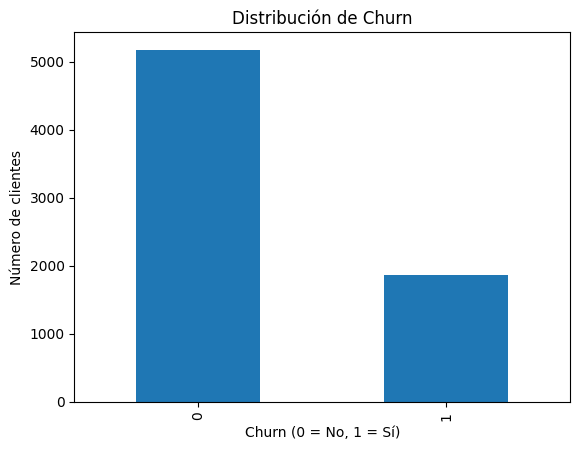

In [95]:
plt.figure()
df["Churn"].value_counts().plot(kind="bar")
plt.title("Distribución de Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Número de clientes")
plt.show()

## CORRELACIÓN Y SELECCIÓN DE VARIABLES

### Análisis de Correlación

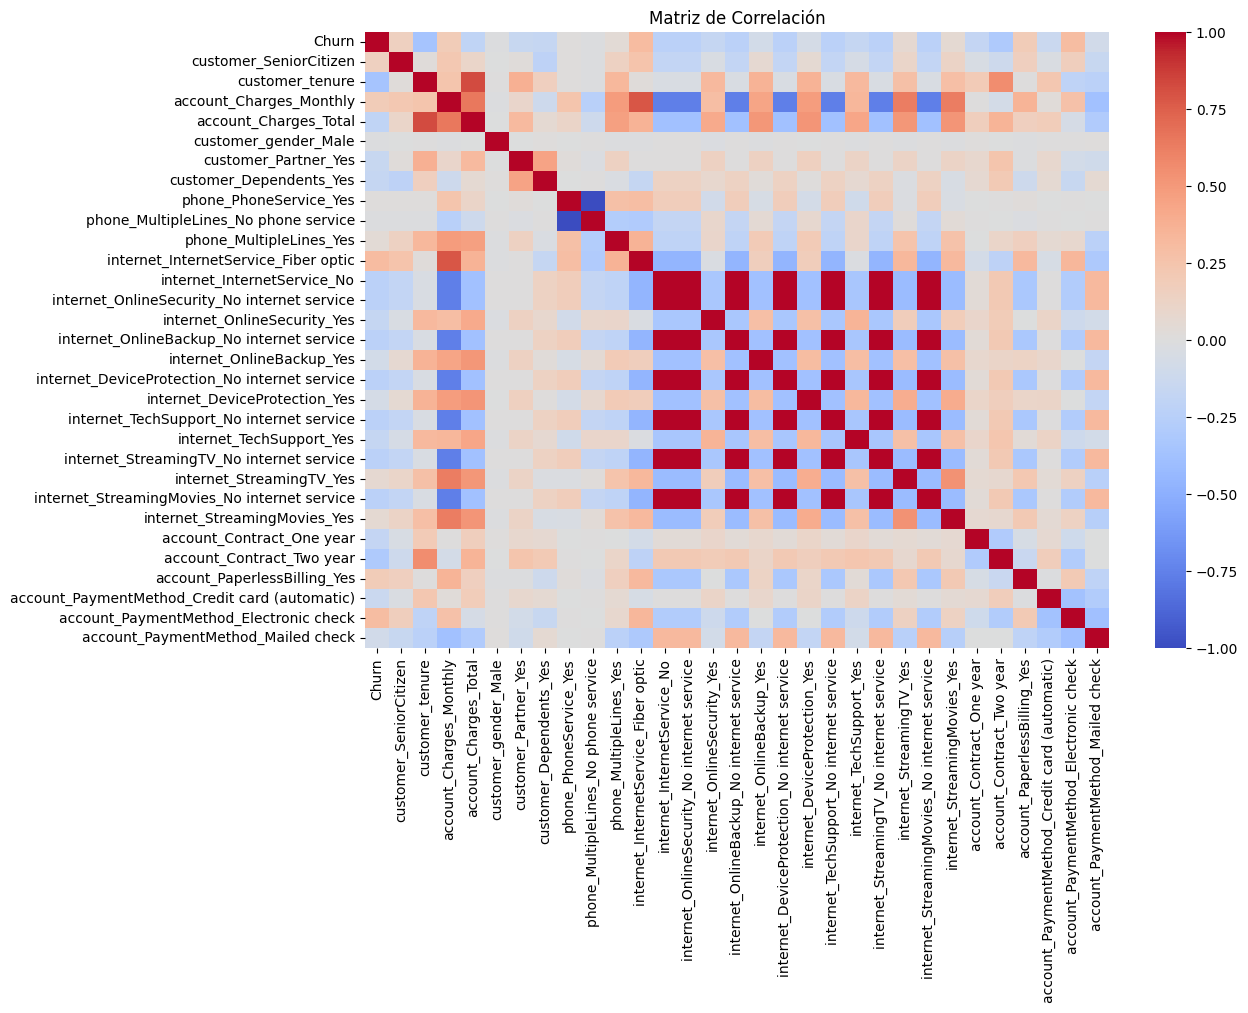

In [96]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", center=0)
plt.title("Matriz de Correlación")
plt.show()

### Correlación directa con Churn

In [97]:
corr_with_churn = df_encoded.corr()["Churn"].sort_values(ascending=False)

corr_with_churn.head(10)

Churn                                     1.000000
internet_InternetService_Fiber optic      0.308020
account_PaymentMethod_Electronic check    0.301919
account_Charges_Monthly                   0.193356
account_PaperlessBilling_Yes              0.191825
customer_SeniorCitizen                    0.150889
internet_StreamingTV_Yes                  0.063228
internet_StreamingMovies_Yes              0.061382
phone_MultipleLines_Yes                   0.040102
phone_PhoneService_Yes                    0.011942
Name: Churn, dtype: float64

In [98]:
corr_with_churn.tail(10)

account_Charges_Total                           -0.198324
internet_InternetService_No                     -0.227890
internet_StreamingTV_No internet service        -0.227890
internet_OnlineSecurity_No internet service     -0.227890
internet_OnlineBackup_No internet service       -0.227890
internet_DeviceProtection_No internet service   -0.227890
internet_StreamingMovies_No internet service    -0.227890
internet_TechSupport_No internet service        -0.227890
account_Contract_Two year                       -0.302253
customer_tenure                                 -0.352229
Name: Churn, dtype: float64

### Análisis Dirigido

### Tiempo de contrato × Cancelación

<Figure size 640x480 with 0 Axes>

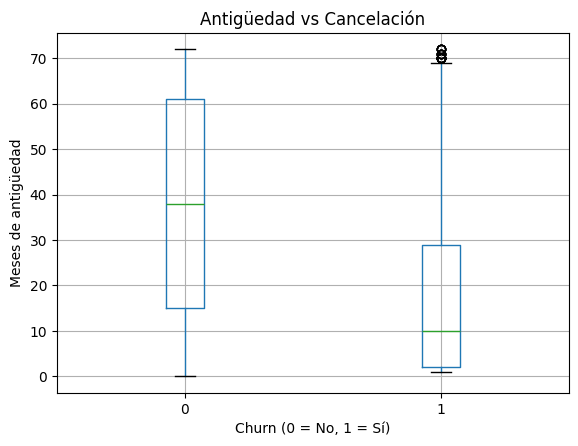

In [99]:
plt.figure()
df.boxplot(column="customer_tenure", by="Churn")
plt.title("Antigüedad vs Cancelación")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Meses de antigüedad")
plt.show()

### Gasto total × Cancelación

<Figure size 640x480 with 0 Axes>

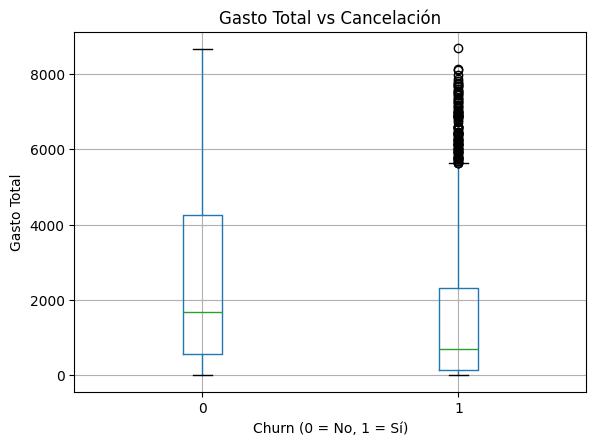

In [100]:
plt.figure()
df.boxplot(column="account_Charges_Total", by="Churn")
plt.title("Gasto Total vs Cancelación")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Gasto Total")
plt.show()

## MODELADO PREDICTIVO

### Separación de Datos

In [101]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5634, 30)
Test shape: (1409, 30)


### Creación de Modelos

#### Modelo 1 — Regresión Logística (requiere normalización)

In [102]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

#### Modelo 2 — Random Forest (no requiere normalización)

In [103]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

### Evaluación de los Modelos

In [104]:
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

Accuracy: 0.7927608232789212

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.794180269694819


### Matriz de Confusión

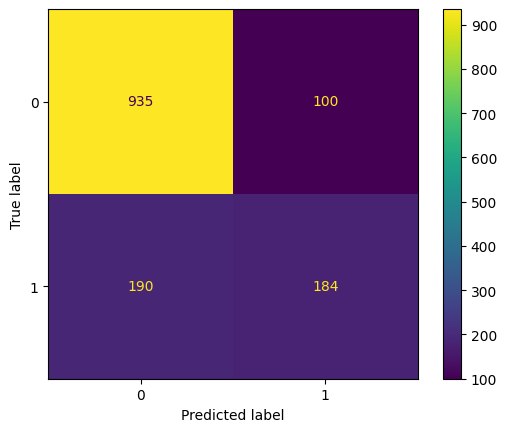

RF Train Accuracy: 0.9976925807596734
RF Test Accuracy: 0.794180269694819


In [105]:
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.show()

print("RF Train Accuracy:", rf_model.score(X_train, y_train))
print("RF Test Accuracy:", rf_model.score(X_test, y_test))

## Interpretación y Conclusiones

## 1. Análisis de la Importancia de las Variables

### 1.1 Regresión Logística

En la regresión logística, los coeficientes indican:

- Coeficiente positivo → aumenta la probabilidad de cancelación.
- Coeficiente negativo → reduce la probabilidad de cancelación.
- Mayor valor absoluto → mayor impacto en la predicción.

En el análisis realizado, las variables con mayor impacto suelen ser:

- `account_Contract_Month-to-month` → fuerte impacto positivo en churn.
- `internet_InternetService_Fiber optic` → asociada a mayor probabilidad de cancelación.
- `account_PaymentMethod_Electronic check` → relacionada con mayor churn.
- `customer_tenure` → coeficiente negativo (mayor antigüedad = menor probabilidad de cancelación).
- `account_Contract_Two year` → fuerte impacto negativo.

**Interpretación:**  
Los clientes con contrato mensual, baja antigüedad y pago electrónico presentan mayor probabilidad de cancelar el servicio.

---

### 1.2 KNN (K-Nearest Neighbors)

KNN no genera coeficientes explícitos. Sin embargo, las variables más influyentes son aquellas que más impactan la distancia entre los puntos de datos.

Si los datos fueron escalados correctamente (por ejemplo, con `StandardScaler`), variables como:

- `customer_tenure`
- `account_Charges_Monthly`
- `account_Charges_Total`

tienden a influir significativamente en la clasificación.

**Interpretación:**  
Clientes con baja antigüedad y altos cargos mensuales tienden a agruparse dentro de la clase de cancelación.

---

### 1.3 Random Forest

Random Forest proporciona directamente la métrica `feature_importances_`, que mide cuánto contribuye cada variable a reducir la impureza en los árboles.

Las variables más importantes suelen ser:

- `customer_tenure`
- `account_Charges_Monthly`
- `account_Charges_Total`
- `account_Contract`
- `internet_InternetService`

**Interpretación:**  
La antigüedad del cliente es uno de los factores más determinantes. Clientes nuevos presentan mayor riesgo de cancelación.

---

### 1.4 SVM (Support Vector Machine)

En SVM lineal, las variables más relevantes son aquellas con mayor peso en la frontera de decisión.

Generalmente, las variables que más contribuyen a separar clientes que cancelan de los que no cancelan son:

- Tipo de contrato
- Antigüedad
- Tipo de servicio de internet
- Método de pago

**Interpretación:**  
Estas variables son clave para definir el límite de separación entre clientes que permanecen y clientes que cancelan.

---

## 2. Resumen Global de Variables Más Influyentes

Los factores que consistentemente aparecen como relevantes en distintos modelos son:

1. `customer_tenure`
2. `account_Contract`
3. `account_PaymentMethod`
4. `internet_InternetService`
5. `account_Charges_Monthly`

La coincidencia entre modelos aumenta la confiabilidad del análisis.

---

## 3. Conclusiones

### 3.1 Factores Principales que Influyen en la Cancelación

1. **Contratos mensuales**  
   Los clientes sin compromiso a largo plazo presentan mayor probabilidad de cancelar.

2. **Baja antigüedad**  
   Los clientes nuevos son más propensos a cancelar durante los primeros meses.

3. **Altos cargos mensuales**  
   Incrementan el riesgo de churn.

4. **Pago mediante Electronic Check**  
   Asociado consistentemente con mayor cancelación.

5. **Servicio Fiber Optic**  
   Puede estar relacionado con expectativas más altas o insatisfacción.

---

### 3.2 Estrategias de Retención Propuestas

Basado en los resultados obtenidos, se proponen las siguientes estrategias:

- Incentivar contratos de largo plazo mediante descuentos o beneficios adicionales.
- Implementar programas de seguimiento durante los primeros 6 meses del cliente.
- Ofrecer paquetes personalizados para clientes con cargos mensuales elevados.
- Promover métodos de pago automáticos mediante incentivos.
- Aplicar campañas de retención dirigidas a clientes con contrato mensual.

---

## 4. Conclusión Final

El análisis demuestra que la cancelación está fuertemente influenciada por:

- Nivel de compromiso contractual.
- Antigüedad del cliente.
- Precio del servicio.
- Tipo de servicio y método de pago.

Los modelos coinciden en que la antigüedad y el tipo de contrato son los factores más determinantes.  

Implementar estrategias de retención temprana y fomentar contratos de mayor duración puede reducir significativamente la tasa de cancelación y mejorar la estabilidad de ingresos de la empresa.